In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df_all = pd.read_csv('format_stack.csv')

non_zero_columns = df_all.loc[:, (df_all != 0).any(axis=0)]
st_languages = [col for col in non_zero_columns.columns if col != 'year']  

df=df_all['Python']

In [3]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [4]:
# Train with Holt's Linear Trend Model
holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
model = holt_model.fit(optimized=True)

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 251.78573124891065, MSE: 77274.69055262364, RMSE: 277.9832558853566


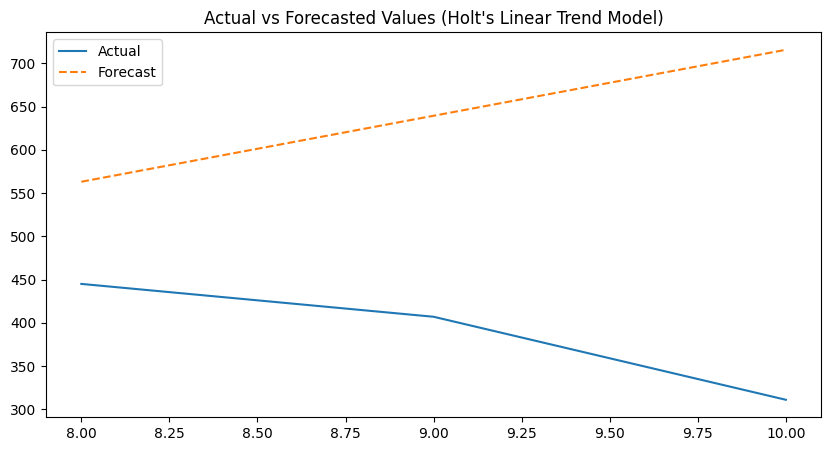

In [5]:

# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values (Holt's Linear Trend Model)")
plt.show()

In [7]:
d = {'language': [], 'mae': [], 'mse': [], 'rmse': []}

tscv = TimeSeriesSplit(n_splits=5)  

for language in st_languages:
    df1 = df_all[language]
    
    mae_list, mse_list, rmse_list = [], [], []
    
    for train_index, test_index in tscv.split(df1):
        train, test = df1[train_index], df1[test_index]
        
        holt_model = ExponentialSmoothing(train, trend="additive", seasonal=None)
        model = holt_model.fit(optimized=True)
        
        forecast = model.forecast(steps=len(test))
        
        mae = mean_absolute_error(test, forecast)
        mse = mean_squared_error(test, forecast)
        rmse = np.sqrt(mse)
        
        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
    
    d['language'].append(language)
    d['mae'].append(np.mean(mae_list))
    d['mse'].append(np.mean(mse_list))
    d['rmse'].append(np.mean(rmse_list))

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_holtwinters.csv', index=False)


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:1418: RuntimeWarning: invalid value encountered in scalar add
  aicc = aic + aicc_penalty
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:1419: RuntimeWarning: divide by zero encountered in log
  bic = self.nobs * np.log(sse / self.nobs) + k * np.log(self.nobs)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:1412: RuntimeWarning: divide by zero encountered in log
  aic = self.nobs * np.log(sse / self.nobs) + k * 2
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:1418: RuntimeWarning: inv